done!


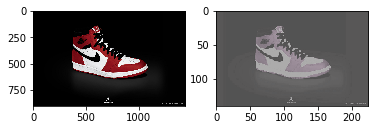

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


def GPU_config():
    gpuConfig = tf.ConfigProto()
    gpuConfig.allow_soft_placement = True
    gpuConfig.gpu_options.allow_growth = True
    gpuConfig.gpu_options.per_process_gpu_memory_fraction = 1.0
    gpuConfig.log_device_placement = False
    return gpuConfig


class TFImageAugmentor:
    def __init__(self, cfg, **kwargs):
        self.cfg = cfg
        
        
    def aug_image(self, image, **kwargs):        
        image = tf.image.random_brightness(image, max_delta=0.9, seed=None)
        
        image = tf.image.random_contrast(image, lower=0.1, upper=0.9, seed=None)

        image = tf.image.random_flip_left_right(image, seed=None)

        image = tf.image.random_flip_up_down(image, seed=None)

        image = tf.image.random_hue(image, max_delta=0.3, seed=None)

        image = tf.image.random_jpeg_quality(image, min_jpeg_quality=50, max_jpeg_quality=90, seed=None)

        image = tf.image.random_saturation(image, lower=0.1, upper=0.9, seed=None)
        
        image = tf.image.resize_images(image, (224,224), align_corners=True, preserve_aspect_ratio=True, name=None)
        
        image = tf.cast(image,dtype=tf.uint8)
        
        return image

    
tf.reset_default_graph()

image_path = "../data/01.jpg"
image_raw = tf.gfile.FastGFile(image_path,'rb').read()
image_org = tf.image.decode_jpeg(image_raw)

with tf.Session(config = GPU_config()) as sess:
    sess.run(tf.global_variables_initializer())
    tfImageAugmentor = TFImageAugmentor(None)
    aug_image = tfImageAugmentor.aug_image(image_org)    
    org_image = sess.run(image_org)  
    out_image = sess.run(aug_image)
    
plt.figure()
plt.subplot(1,2,1)
plt.imshow(org_image)
plt.subplot(1,2,2)
plt.imshow(out_image)
    
    
print("done!")